# Analysis of **Food and Agricultural Organization** data of **African Nations** from 2014 to 2018

## Project Overview: Analysis of FAO Data of African Nations (2014–2018)

This project analyzes **Food and Agriculture Organization (FAO)** data of 47 African nations from 2014 to 2018 to explore patterns and trends in food balance across different countries and items. These regions include: 

_Algeria, Angola, Benin, Botswana, Burkina Faso, Cabo Verde, Cameroon, Central African Republic, Chad, Comoros, Congo, Côte d'Ivoire, Djibouti, Egypt, Eswatini, Ethiopia, Gabon, Gambia, Ghana, Guinea, Guinea-Bissau, Kenya, Lesotho, Liberia, Madagascar, Malawi, Mali, Mauritania, Mauritius, Morocco, Mozambique, Namibia, Niger, Nigeria, Rwanda, Sao Tome and Principe, Senegal, Seychelles, Sierra Leone, South Africa, Sudan, Togo, Tunisia, Uganda, United Republic of Tanzania, Zambia, and Zimbabwe._

The goal is to understand how food production, supply, and consumption vary over time and between regions.

### Objective

To extract insights from the FAO dataset that reveal the state of food availability and consumption patterns, and to identify which food items contribute most to national food supplies.

### Key Questions

1. Which food items contribute most to food supply across the years?
2. How has the import and export of different food types changed between 2014 and 2018?
3. What are the top food items in terms of **import** or **export**?
4. Which countries have the highest or lowest food **import** and **export**?

### Dataset Description

The dataset used in this analysis — `FoodBalanceSheets_Africa.csv` — is provided by the FAO and contains information on:

* Food production, imports, and exports
* Domestic supply and food availability
* Data across multiple countries and food items (2014–2018)

## Loading the data 

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the FAO data 
df = pd.read_csv("FoodBalanceSheets_Africa.csv", encoding = 'Latin-1')

In [3]:
# View the first rows
df.head(40)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,4,Algeria,2501,Population,511,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,4,Algeria,2501,Population,5301,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,4,Algeria,2901,Grand Total,664,Food supply (kcal/capita/day),kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,4,Algeria,2901,Grand Total,674,Protein supply quantity (g/capita/day),g/capita/day,94.90,94.35,94.72,92.82,91.83
4,4,Algeria,2901,Grand Total,684,Fat supply quantity (g/capita/day),g/capita/day,80.06,79.36,77.40,80.19,77.28
5,4,Algeria,2903,Vegetal Products,664,Food supply (kcal/capita/day),kcal/capita/day,2932.00,2958.00,2941.00,2921.00,2932.00
6,4,Algeria,2903,Vegetal Products,674,Protein supply quantity (g/capita/day),g/capita/day,67.14,67.38,67.37,66.11,67.10
7,4,Algeria,2903,Vegetal Products,684,Fat supply quantity (g/capita/day),g/capita/day,53.84,54.72,52.04,55.59,54.57
8,4,Algeria,2941,Animal Products,664,Food supply (kcal/capita/day),kcal/capita/day,444.00,421.00,431.00,421.00,390.00
9,4,Algeria,2941,Animal Products,674,Protein supply quantity (g/capita/day),g/capita/day,27.76,26.97,27.35,26.71,24.73


In [4]:
# View the last rows 
df.tail(10)

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
60933,181,Zimbabwe,2899,Miscellaneous,5611,Import Quantity,1000 tonnes,42.00,47.00,33.00,15.00,16.00
60934,181,Zimbabwe,2899,Miscellaneous,5072,Stock Variation,1000 tonnes,0.00,0.00,0.00,-4.00,0.00
60935,181,Zimbabwe,2899,Miscellaneous,5911,Export Quantity,1000 tonnes,1.00,1.00,0.00,0.00,1.00
60936,181,Zimbabwe,2899,Miscellaneous,5301,Domestic supply quantity,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60937,181,Zimbabwe,2899,Miscellaneous,5170,Residuals,1000 tonnes,0.00,0.00,0.00,0.00,0.00
60938,181,Zimbabwe,2899,Miscellaneous,5142,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,181,Zimbabwe,2899,Miscellaneous,645,Food supply quantity (kg/capita/yr),kg,3.06,3.33,2.35,1.33,1.08
60940,181,Zimbabwe,2899,Miscellaneous,664,Food supply (kcal/capita/day),kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,181,Zimbabwe,2899,Miscellaneous,674,Protein supply quantity (g/capita/day),g/capita/day,0.10,0.11,0.08,0.04,0.04
60942,181,Zimbabwe,2899,Miscellaneous,684,Fat supply quantity (g/capita/day),g/capita/day,0.04,0.05,0.03,0.02,0.01


## Data Cleaning

In [5]:
# Check for null values for each colunn
df.isnull().sum()

Area Code          0
Area               0
Item Code          0
Item               0
Element Code       0
Element            0
Unit               0
Y2014           1589
Y2015           1548
Y2016           1535
Y2017           1506
Y2018           1436
dtype: int64

In [6]:
# Observe rows with null values
df[df.isnull()]

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
60938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Remove rows with null values
df = df.dropna()

In [8]:
# Check for duplicated rows
df.duplicated().sum()

0

In [9]:
# Remove unnecessary columns (element code, item code and area code)
df = df.drop(["Area Code", "Element Code", "Item Code"], axis = 1)

In [10]:
# Check the data types and formats
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 57784 entries, 0 to 60942
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Area     57784 non-null  object 
 1   Item     57784 non-null  object 
 2   Element  57784 non-null  object 
 3   Unit     57784 non-null  object 
 4   Y2014    57784 non-null  float64
 5   Y2015    57784 non-null  float64
 6   Y2016    57784 non-null  float64
 7   Y2017    57784 non-null  float64
 8   Y2018    57784 non-null  float64
dtypes: float64(5), object(4)
memory usage: 4.4+ MB


In [11]:
df.columns

Index(['Area', 'Item', 'Element', 'Unit', 'Y2014', 'Y2015', 'Y2016', 'Y2017',
       'Y2018'],
      dtype='object')

In [12]:
#get the unique Areas, Item, Element and Unit for all the rows 
for i in ['Area', 'Item', 'Element', 'Unit']:
    print(df[i].value_counts())
    print ()

Area
Kenya                          1521
Nigeria                        1438
Egypt                          1437
Senegal                        1437
Côte d'Ivoire                  1431
Uganda                         1420
Cameroon                       1415
Madagascar                     1405
Zambia                         1395
South Africa                   1391
Ethiopia                       1390
United Republic of Tanzania    1386
Mozambique                     1369
Malawi                         1363
Rwanda                         1355
Angola                         1350
Burkina Faso                   1343
Botswana                       1342
Morocco                        1338
Zimbabwe                       1337
Congo                          1336
Guinea                         1323
Mauritius                      1321
Ghana                          1311
Niger                          1308
Tunisia                        1293
Namibia                        1247
Algeria                

In [13]:
# Check food supply quantities with kg/capita/yr
df[df.Element.str.contains("/capita/yr", case = False)].head(20)

,Area,Item,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
23,Algeria,Cereals - Excluding Beer,Food supply quantity (kg/capita/yr),kg,219.56,219.72,221.98,216.02,218.31
39,Algeria,Wheat and products,Food supply quantity (kg/capita/yr),kg,186.46,186.90,189.14,186.07,184.58
54,Algeria,Rice and products,Food supply quantity (kg/capita/yr),kg,4.07,4.14,4.09,4.14,4.03
69,Algeria,Barley and products,Food supply quantity (kg/capita/yr),kg,12.54,12.03,11.98,10.05,14.70
84,Algeria,Maize and products,Food supply quantity (kg/capita/yr),kg,16.44,16.55,16.49,15.57,14.86
93,Algeria,Rye and products,Food supply quantity (kg/capita/yr),kg,0.00,0.00,0.00,0.00,0.00
107,Algeria,Oats,Food supply quantity (kg/capita/yr),kg,0.00,0.00,0.01,0.01,0.04
125,Algeria,Sorghum and products,Food supply quantity (kg/capita/yr),kg,0.03,0.07,0.22,0.13,0.08
138,Algeria,"Cereals, Other",Food supply quantity (kg/capita/yr),kg,0.02,0.04,0.05,0.05,0.01
153,Algeria,Starchy Roots,Food supply quantity (kg/capita/yr),kg,66.92,67.18,67.28,67.22,67.10


In [14]:
# Convert the unit of the elements with kg/capita/yr from kg to kg/capita/yr
df.loc[df.Element.str.contains("/capita/yr", case = False),"Unit"] = "kg/capita/yr"

In [15]:
df["Element"].unique()

array(['Total Population - Both sexes', 'Domestic supply quantity',
       'Food supply (kcal/capita/day)',
       'Protein supply quantity (g/capita/day)',
       'Fat supply quantity (g/capita/day)', 'Production',
       'Import Quantity', 'Stock Variation', 'Export Quantity', 'Feed',
       'Seed', 'Losses', 'Processing', 'Other uses (non-food)',
       'Residuals', 'Food', 'Food supply quantity (kg/capita/yr)',
       'Tourist consumption'], dtype=object)

## **FAO Food Balance Sheet Indicators Explained**

| **Column Name**                            | **Meaning / Definition**                                                                                                       | **Interpretation / Use**                                             |
| ------------------------------------------ | ------------------------------------------------------------------------------------------------------------------------------ | -------------------------------------------------------------------- |
| **Total Population - Both sexes**          | The total population (male + female) of the country for the given year.                                                        | Used to calculate **per capita** indicators (e.g., kcal/person/day). |
| **Domestic supply quantity**               | Total quantity of the commodity available for use within the country after adjusting for production, trade, and stock changes. | Represents **total internal availability** of the food item.         |
| **Food supply (kcal/capita/day)**          | Average daily dietary energy (calories) available per person from the commodity.                                               | Indicates **energy availability** and food security.                 |
| **Protein supply quantity (g/capita/day)** | Average grams of protein per person per day from the commodity.                                                                | Reflects **nutritional quality** of the food supply.                 |
| **Fat supply quantity (g/capita/day)**     | Average grams of fat per person per day from the commodity.                                                                    | Complements protein to show **dietary balance**.                     |
| **Production**                             | Quantity of the commodity produced domestically.                                                                               | Shows **agricultural output** within the country.                    |
| **Import Quantity**                        | Quantity of the commodity imported.                                                                                            | Reflects **dependency on imports** for food.                         |
| **Stock Variation**                        | Change in stocks between the beginning and end of the year (positive = increase, negative = decrease).                         | Indicates **inventory adjustments**.                                 |
| **Export Quantity**                        | Quantity of the commodity exported.                                                                                            | Shows **outflow of food** from the country.                          |
| **Feed**                                   | Amount used as **animal feed** (not for human consumption).                                                                    | Reflects livestock-related demand.                                   |
| **Seed**                                   | Quantity used for **planting next season**.                                                                                    | Part of non-food agricultural use.                                   |
| **Losses**                                 | Quantity lost during **storage, transport, or processing**.                                                                    | Indicates **inefficiencies or waste** in the supply chain.           |
| **Processing**                             | Quantity used for **industrial transformation** into other products (e.g., grains into flour or oil).                          | Measures **industrial food use**.                                    |
| **Other uses (non-food)**                  | Quantities used for **non-food purposes** (biofuels, manufacturing, etc.).                                                     | Captures **industrial or technical use**.                            |
| **Residuals**                              | Balancing item for small data inconsistencies between supply and use.                                                          | Should be small — indicates data adjustment.                         |
| **Food**                                   | Quantity available for **human consumption** (tonnes or 1000 tonnes).                                                          | Represents **actual food availability**.                             |
| **Food supply quantity (kg/capita/yr)**    | Average **kilograms of food per person per year**.                                                                             | Useful for **comparisons between countries**.                        |
| **Tourist consumption**                    | Quantity consumed by **tourists or non-residents** within the country.                                                         | Often small, but notable for tourist-heavy economies.                |

In [16]:
def remove_unit(text):
    text = text[:text.find("(")].strip()
    return text

In [17]:
remove_unit("Food supply (kcal/capita/day)")

'Food supply'

In [18]:
# Remove the units in bracket from the elements 
df.loc[df["Element"].str.contains("capita"), "Element"] = df[df["Element"].str.contains("capita")]["Element"].apply(remove_unit)
df

,Area,Item,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018
0,Algeria,Population,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00
1,Algeria,Population,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00
2,Algeria,Grand Total,Food supply,kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00
3,Algeria,Grand Total,Protein supply quantity,g/capita/day,94.90,94.35,94.72,92.82,91.83
4,Algeria,Grand Total,Fat supply quantity,g/capita/day,80.06,79.36,77.40,80.19,77.28
...,...,...,...,...,...,...,...,...,...
60938,Zimbabwe,Miscellaneous,Food,1000 tonnes,42.00,46.00,33.00,19.00,16.00
60939,Zimbabwe,Miscellaneous,Food supply quantity,kg/capita/yr,3.06,3.33,2.35,1.33,1.08
60940,Zimbabwe,Miscellaneous,Food supply,kcal/capita/day,3.00,4.00,3.00,1.00,1.00
60941,Zimbabwe,Miscellaneous,Protein supply quantity,g/capita/day,0.10,0.11,0.08,0.04,0.04


In [19]:
df.loc[:,"Total for the years"] = df.Y2014 + df.Y2015 + df.Y2016 + df.Y2017 + df.Y2018
df.groupby("Area")["Total for the years"].sum()

Area
Algeria                        1630749.39
Angola                         1097232.66
Benin                           593841.43
Botswana                        113565.79
Burkina Faso                    530202.44
Cabo Verde                       72958.61
Cameroon                       1139496.72
Central African Republic        147045.47
Chad                            348324.73
Comoros                            247.93
Congo                           202713.64
Côte d'Ivoire                  1070511.34
Djibouti                        113227.22
Egypt                          4294913.50
Eswatini                        270604.70
Ethiopia                       2189010.15
Ethiopia PDR                         0.00
Gabon                           140942.58
Gambia                          107690.35
Ghana                          1630036.87
Guinea                          480858.89
Guinea-Bissau                    92289.95
Kenya                          1315936.22
Lesotho                      

In [20]:
# Remove Sudan (former)
df = df[~(df.Area == "Sudan (former)")]

In [21]:
# Remove Ethiopia PDR
df = df[~(df.Area == "Ethiopia PDR")]

## Exploratory Data Analysis (EDA)

### 1) Total Quantity of Food Exported between 2014 and 2018

In [22]:
exports = df[df.Element == "Export Quantity"].groupby("Area")["Total for the years"].sum().reset_index()

exports.columns = ["Area", "Total Exports (1000 tonnes)"]
exports

,Area,Total Exports (1000 tonnes)
0,Algeria,6068.56
1,Angola,24781.00
2,Benin,2811.71
3,Botswana,568.96
4,Burkina Faso,4713.94
5,Cabo Verde,274.01
6,Cameroon,6168.94
7,Central African Republic,6.52
8,Chad,141.10
9,Comoros,0.00


In [23]:
# Total Food Exports from African Countries
exports["Total Exports (1000 tonnes)"].sum() * 1000

821011170.0

A Total of **821,011,170 tonnes (821 million tonnes)** was exported between 2014 and 2018

### 2) Did Exports grow or reduce throughout the four years?

In [24]:
export_yearly = df[df.Element == "Export Quantity"].groupby("Area")[["Y2014","Y2015","Y2016","Y2017","Y2018"]].sum().reset_index()
export_yearly

,Area,Y2014,Y2015,Y2016,Y2017,Y2018
0,Algeria,1325.64,1101.62,1339.22,1492.54,809.54
1,Angola,2716.97,2174.58,3904.89,8026.28,7958.28
2,Benin,445.58,579.59,461.66,600.44,724.44
3,Botswana,120.90,134.58,120.12,91.68,101.68
4,Burkina Faso,776.66,1038.32,779.64,1031.16,1088.16
5,Cabo Verde,45.19,79.33,63.51,42.99,42.99
6,Cameroon,1135.71,1284.94,1374.97,1295.16,1078.16
7,Central African Republic,0.00,0.00,0.00,6.26,0.26
8,Chad,20.24,26.20,28.22,30.22,36.22
9,Comoros,0.00,0.00,0.00,0.00,0.00


In [25]:
year_sum_of_exports = export_yearly.sum().reset_index().drop(0, axis = 0)
year_sum_of_exports.columns = ["Year", "Sum"]
year_sum_of_exports

,Year,Sum
1,Y2014,149683.64
2,Y2015,157195.47
3,Y2016,151372.46
4,Y2017,181691.8
5,Y2018,181067.8


In [26]:
year_sum_of_exports["% Growth in exports for each year"] = ((year_sum_of_exports["Sum"] - year_sum_of_exports["Sum"].shift())/year_sum_of_exports["Sum"].shift())*100
year_sum_of_exports["% Growth in exports for each year"] = year_sum_of_exports["% Growth in exports for each year"].map("{:.2f}".format).astype(float).fillna(0)
year_sum_of_exports

,Year,Sum,% Growth in exports for each year
1,Y2014,149683.64,0.00
2,Y2015,157195.47,5.02
3,Y2016,151372.46,-3.70
4,Y2017,181691.8,20.03
5,Y2018,181067.8,-0.34


[]

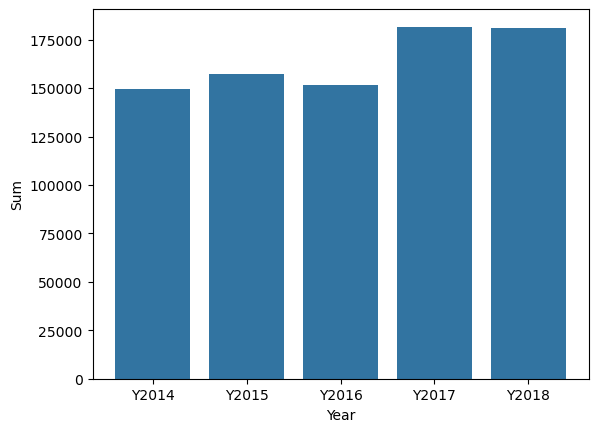

In [27]:
sns.barplot(data = year_sum_of_exports, x = "Year", y = "Sum")
plt.plot()

In [28]:
# Calculate the average growth in exports
year_sum_of_exports["% Growth in exports for each year"].mean()

4.202

The exports increased over time, with an average annual growth rate of **4.2%.**

### 3) What is the total number of imports and has Africa been importing or exporting more food?

In [29]:
# Calculate total import for all African countries
imports = df[df.Element == "Import Quantity"].groupby("Area")["Total for the years"].sum().reset_index()

imports.columns = ["Area", "Total Imports (1000 tonnes)"]
imports

,Area,Total Imports (1000 tonnes)
0,Algeria,181775.69
1,Angola,40503.40
2,Benin,30927.70
3,Botswana,8980.60
4,Burkina Faso,11260.94
5,Cabo Verde,2313.15
6,Cameroon,21711.16
7,Central African Republic,546.12
8,Chad,2772.90
9,Comoros,10.24


In [30]:
# Total Food Imports from African Countries
round(imports["Total Imports (1000 tonnes)"].sum() * 1000, 2)

1409220900.0

A Total of **1,409,220,900 tonnes (1.4 billion tonnes)** was imported between 2014 and 2018. 

Africa had been importing approximately **71.6%** more food than it exported

### 4) What countries have been at the forefront of imports, exports and production

In [31]:
# Calculate total production from all African countries
production = df[df.Element == "Production"].groupby("Area")["Total for the years"].sum().reset_index()

production.columns = ["Area", "Total Production (1000 tonnes)"]
production

,Area,Total Production (1000 tonnes)
0,Algeria,276176.14
1,Angola,267180.53
2,Benin,130688.97
3,Botswana,7659.84
4,Burkina Faso,114930.50
5,Cabo Verde,1698.35
6,Cameroon,300452.06
7,Central African Republic,27084.66
8,Chad,73351.60
9,Comoros,72.37


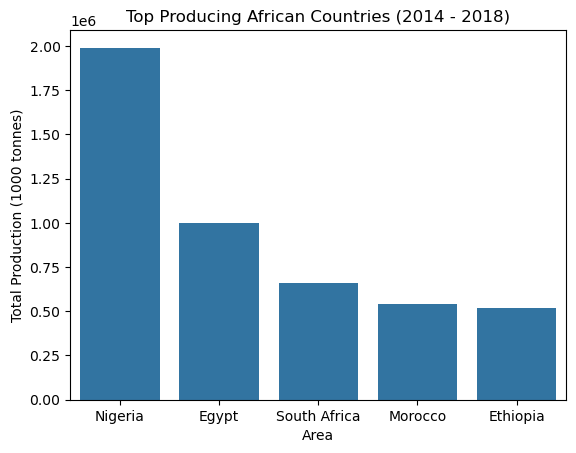

In [32]:
#Top five producers in Africa
top_producers = production.sort_values(by = "Total Production (1000 tonnes)", ascending = False)[:5]

sns.barplot(data = top_producers, x = "Area", y = "Total Production (1000 tonnes)")
plt.title("Top Producing African Countries (2014 - 2018)")
plt.show()

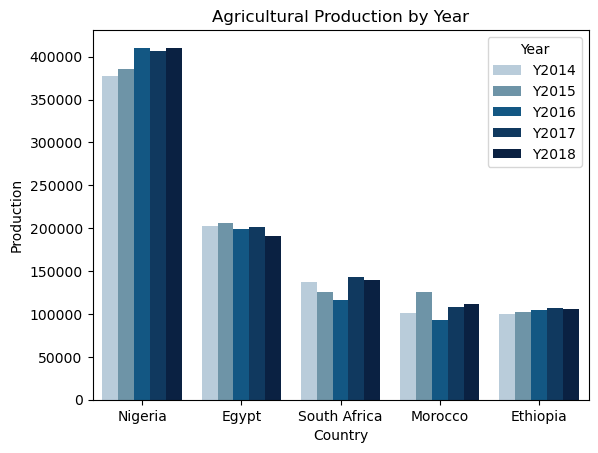

In [33]:
# Calculate total production from all African countries, across the five years
production_yearly = df[df.Element == "Production"].groupby("Area")[["Y2014","Y2015","Y2016","Y2017","Y2018"]].sum().reset_index()

# Only get the data of the top countries
production_yearly = production_yearly[production_yearly.Area.isin(["Nigeria","Egypt", "South Africa", "Morocco", "Ethiopia"])]

# Order them in the same order as the former chart
production_yearly["Area"] = pd.Categorical(production_yearly["Area"], categories = ["Nigeria","Egypt", "South Africa", "Morocco", "Ethiopia"], ordered = True)
production_yearly.sort_values("Area")

#reshape to long format (compartible with seaborn for compound bar charts)
df_long = production_yearly.melt(id_vars = "Area", var_name = "Year", value_name = "Production")

# Blue Palette (for Aesthetics)
blue_palette = ["#b3cde0", "#6497b1", "#005b96", "#03396c", "#011f4b"]

# Plot the results
sns.barplot(data = df_long, x = "Area", y = "Production", hue = "Year", palette = blue_palette)

plt.title("Agricultural Production by Year")
plt.xlabel("Country")
plt.show()

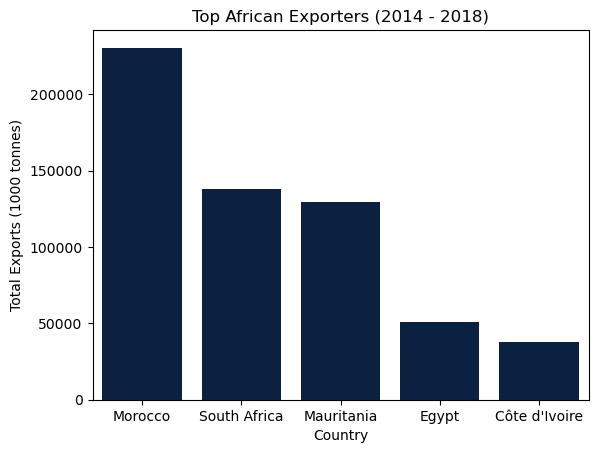

In [34]:
#Get the top five importers and exporters
top_exporters = exports.sort_values(by = "Total Exports (1000 tonnes)", ascending = False)[:5]

#Plot the results
sns.barplot (data = top_exporters, x = "Area", y = "Total Exports (1000 tonnes)", color = "#011f4b")
plt.title("Top African Exporters (2014 - 2018)")
plt.xlabel("Country")
plt.show()

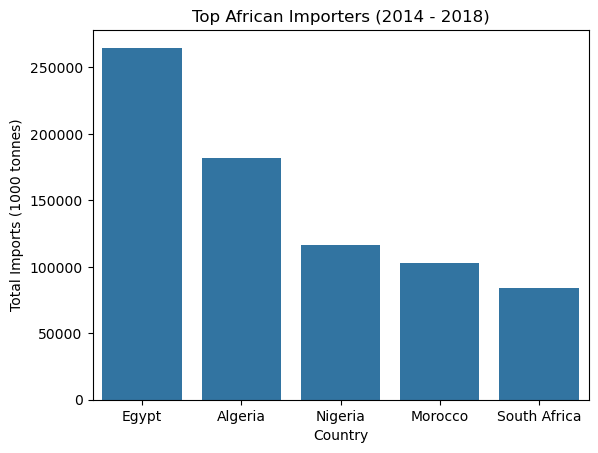

In [35]:
top_importers = imports.sort_values(by = "Total Imports (1000 tonnes)", ascending = False)[:5]

#Plot the results
sns.barplot (data = top_importers, x = "Area", y = "Total Imports (1000 tonnes)")
plt.title("Top African Importers (2014 - 2018)")
plt.xlabel("Country")
plt.show()

### 5) What is the most imported and the most exported product

In [36]:
df.head()

,Area,Item,Element,Unit,Y2014,Y2015,Y2016,Y2017,Y2018,Total for the years
0,Algeria,Population,Total Population - Both sexes,1000 persons,38924.00,39728.00,40551.00,41389.00,42228.00,202820.00
1,Algeria,Population,Domestic supply quantity,1000 tonnes,0.00,0.00,0.00,0.00,0.00,0.00
2,Algeria,Grand Total,Food supply,kcal/capita/day,3377.00,3379.00,3372.00,3341.00,3322.00,16791.00
3,Algeria,Grand Total,Protein supply quantity,g/capita/day,94.90,94.35,94.72,92.82,91.83,468.62
4,Algeria,Grand Total,Fat supply quantity,g/capita/day,80.06,79.36,77.40,80.19,77.28,394.29


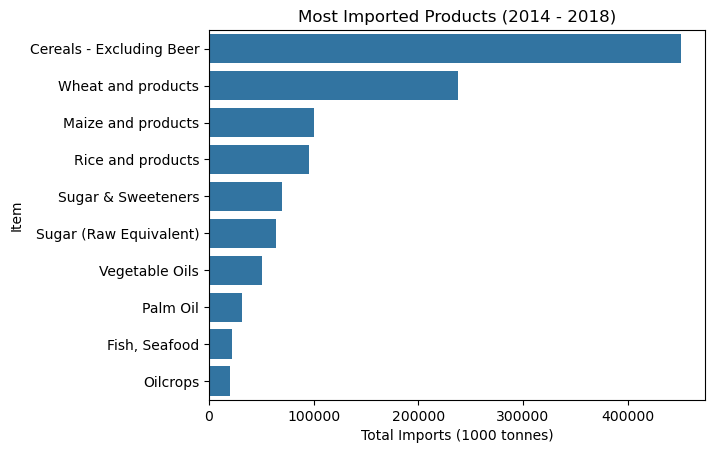

In [37]:
imported_items = df[df["Element"] == "Import Quantity"].groupby("Item").sum()["Total for the years"].reset_index()
imported_items = imported_items.sort_values(by = "Total for the years", ascending = False)[:10]

sns.barplot(data = imported_items, y = "Item", x = "Total for the years")
plt.title("Most Imported Products (2014 - 2018)")
plt.xlabel("Total Imports (1000 tonnes)")
plt.show()

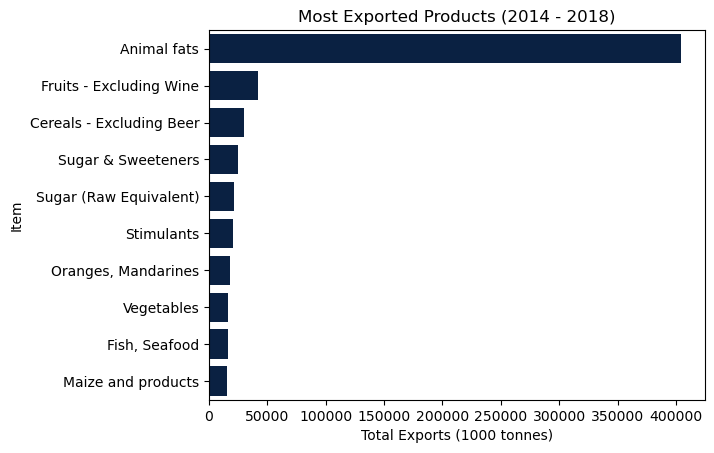

In [38]:
exported_items = df[df["Element"] == "Export Quantity"].groupby("Item").sum()["Total for the years"].reset_index()
exported_items = exported_items.sort_values(by = "Total for the years", ascending = False)[:10]

sns.barplot(data = exported_items, y = "Item", x = "Total for the years", color = "#011f4b")
plt.title("Most Exported Products (2014 - 2018)")
plt.xlabel("Total Exports (1000 tonnes)")
plt.show()

## 1\. Key Insights and Findings

The analysis of the FAO food balance sheets for African Nations from 2014 to 2018 reveals critical patterns in food availability, consumption dependency, and trade specialization across the continent.

| Category | Key Finding | Implication |
| :--- | :--- | :--- |
| **Dominant Imports (Item)** | **Cereals - Excluding Beer** is the most imported food item by quantity, suggesting a widespread, persistent structural deficit in staple grain production across many African countries. | High reliance on the global market for essential food security. |
| **Dominant Food Supply (Item)** | **Cereals, Roots, and Tubers** collectively dominate per capita food supply (kg/capita/yr), confirming their role as the cornerstone of the African diet and calorie intake. | Diets are often heavily focused on starchy staples, which can impact nutritional diversity. |
| **Dominant Exports (Item)** | Agricultural products often exported for processing, such as **Vegetables, Fruits, and specialized cash crops**, dominate the export quantity. | Trade is heavily focused on raw or semi-processed commodities, limiting value capture. |
| **Regional Concentration** | A small number of countries, primarily **Nigeria, Egypt, and South Africa**, account for the vast majority of total production, domestic supply, and import quantities due to their large populations and economic scale. | Food system stability is highly dependent on the performance of a few regional anchors. |
| **Production vs. Trade** | While a few countries exhibit large production capacities, the overall import quantity across the continent remains disproportionately high, indicating a widespread inability to meet domestic demand through local production alone. | The growth in food consumption is outpacing the growth in food production, widening the trade deficit in food. |

-----

## 2\. Business and Economic Interpretation

The analysis provides a clear economic roadmap, highlighting both vulnerabilities and strategic investment opportunities in the African food system.

### **Strategic Vulnerabilities**

  * **Import-Driven Inflation Risk:** The high and concentrated dependency on imported staple foods (Cereals) exposes national economies to **global commodity price volatility and supply chain shocks**. Any geopolitical conflict or disruption in major global grain-producing regions can translate directly into domestic food price inflation, impacting household stability and public spending.
  * **Export Concentration Risk:** The economic value generated from agricultural exports is limited by the concentration on raw commodities. These items typically have low margins and are subject to diminishing returns. This model prevents countries from capturing the higher profit margins associated with downstream processing, manufacturing, and branding.

### **Economic Opportunities & Recommendations**

  * **Import-Substitution Investment (Staples):** The colossal import volume for Cereals represents a massive, currently leaking market. Business and government investment should have been channeled into **modernizing staple food production** (e.g., large-scale mechanized farming, climate-resilient irrigation, improved storage facilities to reduce post-harvest losses). This is a direct import-substitution opportunity with guaranteed domestic demand.
  * **Value-Chain Industrialization (Exports):** To increase economic returns, a strategic shift is required from exporting raw items to exporting **value-added products**. For instance, instead of exporting cocoa beans, invest in local grinding and chocolate manufacturing; instead of raw fruits, invest in juice and concentrate processing. This diversifies revenue streams and creates higher-wage manufacturing jobs.
  * **Regional Trade Integration:** The disparity between major producing/importing areas (e.g., Nigeria, Egypt) and smaller nations indicates potential for **stronger intra-African trade**. Policies should focus on reducing trade barriers (e.g., improving road/rail infrastructure and streamlining border customs) to allow agricultural surplus from one country to meet the food deficits of its neighbors, fostering continental economic resilience.